#Agenda
1. Motivación
2. Audiencia
3. Definición del objetivo
4. Contexto Comercial
5. Problema Comercial
6. Storytelling
7. Exploratory Data Analytics
8. Análisis Univariado y Bivariado
9. Feature Engineering
10. Mejores hiperparámetros y utilización de modelos con FE
11. Mejores hiperparámetros y utilización de modelos con PCA












#1 - Motivación
El presente proyecto tratará el tema de la diabetes, enfermedad crónica que afecta la capacidad del cuerpo de producir o utilizar insulina, lo que lleva a elevados niveles de glucosa en sangre. Es una enfermedad que afecta a uno de cada diez argentinos, con el agravante de que cuatro de cada diez desconocen su condición (fuente: Argentina.gob.ar), y a 442 millones de personas en el mundo aproximadamente, situación que se agrava con el pasar de los años y se prevé que esta tendencia continúe, dándole carácter de pandemia global.

Dado que es imperativo poder sacar conclusiones rápidamente en relación a esta enfermedad, es que se ha decidido hacer análisis sobre un dataset, cuya fuente es Kaggle.com, que contiene diferentes parámetros (si una persona en cuestión es fumadora, sedentaria, qué tan buena es su salud mental, etc.). La idea es poder observar si estos parámetros están relacionados con esta enfermedad y, de ser el caso, cuáles tienen mayor impacto, de modo de poder sacar conclusiones y tomar un curso de acción determinado.

En este desafío se realizarán análisis univariados, para entender las variables que resulten interesantes de manera individual, análisis bivariado, para entender relaciones entre pares de variables y poder visualizar patrones entre las mismas y análisis multivariado, para visualizar relaciones entre tres variables o más. También se realizarán cálculos adicionales, como tratamiento de valores nulos, si es que fuera pertinente.

La conclusión a la que se pretende arribar es detectar si, efectivamente, algunas de las variables de las que se sospecha están relacionadas con la diabete o descartar la idea, si es que en los diferentes análisis no se observaran patrones que indiquen algún tipo de correspondencia.

#2 - Audiencia
Las audiencias potenciales del presente trabajo pueden ser:

Médicos y otros profesionales de la salud podrían estar interesados en los resultados del presente trabajo.
Organizaciones gubernamentales de carácter nacional e internacional, cuyo foco es la salud.
Prensa especializada en salud y prensa en general, en menor medida.

#4 - Contexto Comercial
Dado el gran impacto de la diabetes en la salud pública, se pretende que este proyecto esté alineado con los actores mencionados anteriormente (médicos, organizaciones de la salud, prensa especializada, etc) de manera de abordar esta problemática global. Dada la audiencia a la que se apunta, es importante asegurarse que los resultados obtenidos estén respaldados por evidencia científica sólida.

#5 - Problema Comercial
El objetivo de este proyecto es dar formato a los datos dados y responder mediante visualizaciones y otras herramientas a preguntas como las siguientes, pero no se descarta agregar más preguntas a medida que surjan:

¿Existe relación entre la salud física de una persona y la diabetes?
¿Existe relación entre la salud mental de una persona y la diabetes?
¿La edad es un factor importante en relación a la diabetes?
¿La diabetes tiene mayor preponderancia según el sexo de una persona?
¿El índice de masa corporal es un factor a considerar para determinar si una persona es diabética?
¿La presión arterial es un factor relevante en relación a la diabetes?

#6 - Storytelling

El presente trabajo trata sobre diabetes: esta enfermedad es la novena causa de muertes en el mundo según datos de la OMS. Dicha enfermedad se caracteriza por los elevados niveles de azucar en sangre, esto ocurre cuando el cuerpo no produce suficiente insulina, o cuando las celulas no responden adecuadamente a la insulina que se produce.

Hay que hacer la distinción entre diabetes tipo 1 y tipo 2: la primera es una enfermedad autoinmune, en la que el propio sistema inmunológico ataca las células beta del páncreas, que se encargan de producir la insulina.

Por otro lado, la diabetes tipo 2 es una enfermedad adquirida, provocada por factores genéticos, estilo de vida y el entorno. Los factores de riesgo en la diabetes tipo 2 son la obesidad, la falta de actividad física y la mala alimentación.

Para este trabajo se hará uso de un dataset que contiene diversos datos sobre personas como su salud física, mental, qué tipo de alimentación tiene: si come verduras, si fuma, si bebe alcohol, etc, y además se indica si dicha persona es diabética. Por lo tanto, la idea es ver cuáles de esos parámetros afecta más, o si puede verse algún patrón que nos pueda ayudar a sacar alguna conclusión. Dado que este dataset incluye factores que afectan más a la diabetes tipo 2, se hará hincapié en los pacientes con ese tipo de diabetes.

Sería interesante tener un dataset más detallado sobre qué tipo de alimento consumen las personas, de manera de ver si aquellas que consumen alimentos ultraprocesados (aquellos alimentos que fueron desprovistos de sus nutrientes y se les adiciona sales, azúcares, grasas, etc para hacerlos adictivos) tienen tendencia a desarrollar diabetes por sobre aquellos que se alimentan de manera más equilibrada.

Entonces, con los datos que poseemos, intentaremos responder algunas preguntas:


*   ¿Hay relación entre la diabetes y la salud general de la persona?
*   ¿Hay relación entre la diabetes y el Índice de Masa Corporal?
*   ¿Hay relación entre la diabetes y la salud física de la persona?
*   ¿Hay relación entre la diabetes y la salud mental de la persona?
*   ¿Hay relación entre la diabetes y la educación de la persona?
*   Si tomamos la población de fumadores, ¿se puede concluir que hay una gran proporción de diabéticos entre ellos?
*   Si tomamos la población de gente con el colesterol alto, ¿se puede concluir que hay una gran proporción de diabéticos entre ellos?
*   Si tomamos la población de gente con presión sanguinea alta, ¿se puede concluir que hay una gran proporción de diabéticos entre ellos?

Todas estas preguntas intentarán ser respondidas en el presente proyecto:










#7 - Exploratory Data Analytics

In [1]:
#Instalo la librería Scikit-learn Optimize

!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 1.2 MB/s eta 0:00:00


In [2]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.2 MB/s eta 0:00:00


In [3]:
!pip install imbalanced-learn

In [4]:
#Importo las librerías.

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from skopt import BayesSearchCV
from sklearn.model_selection import StratifiedKFold

#Feature Engineering

from sklearn.preprocessing import PolynomialFeatures
from sklearn.inspection import PartialDependenceDisplay


#Librerías de clasificación

from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#Librerías de métricas

from sklearn.metrics import accuracy_score, confusion_matrix
from skopt.space import Real, Categorical, Integer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [5]:
from google.colab import drive
drive.mount ('/content/gdrive')

Mounted at /content/gdrive


In [6]:
#Abro el archivo CSV en un dataframe.

ruta_diabetes = '/content/gdrive/MyDrive/PreEntrega_3_DS/Dataset_IndicadoresDiabetes.csv'
dfdiabetes = pd.read_csv(ruta_diabetes)

In [7]:
#Imprimo las primeras cinco filas del dataframe.

print(dfdiabetes.head())

   HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0       0.0           0.0     0.0  ...            1.0          0.0      5.0   
1       0.0           1.0     0.0  ...            0.0          1.0      3.0   
2       0.0           0.0     1.0  ...            1.0          1.0      5.0   
3       0.0           1.0     1.0  ...            1.0          0.0      2.0   
4       0.0           1.0     1.0  ...            1.0          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  I

In [8]:
#El dataset posee muchas columnas floats que deben convertirse a categóricas

Vector_Columnas = ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
dfdiabetes[Vector_Columnas] = dfdiabetes[Vector_Columnas].astype('category')
dfdiabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   HeartDiseaseorAttack  253680 non-null  category
 1   HighBP                253680 non-null  category
 2   HighChol              253680 non-null  category
 3   CholCheck             253680 non-null  category
 4   BMI                   253680 non-null  float64 
 5   Smoker                253680 non-null  category
 6   Stroke                253680 non-null  category
 7   Diabetes              253680 non-null  category
 8   PhysActivity          253680 non-null  category
 9   Fruits                253680 non-null  category
 10  Veggies               253680 non-null  category
 11  HvyAlcoholConsump     253680 non-null  category
 12  AnyHealthcare         253680 non-null  category
 13  NoDocbcCost           253680 non-null  category
 14  GenHlth               253680 non-nul

In [9]:
#Observamos si hay datos nulos en el dataset y si existen valores duplicados.

dfdiabetes.isnull().sum()

Duplicados = dfdiabetes[dfdiabetes.duplicated()]

#print(Duplicados)

dfdiabetes = dfdiabetes.drop_duplicates()

print(dfdiabetes)

       HeartDiseaseorAttack HighBP HighChol CholCheck   BMI Smoker Stroke  \
0                       0.0    1.0      1.0       1.0  40.0    1.0    0.0   
1                       0.0    0.0      0.0       0.0  25.0    1.0    0.0   
2                       0.0    1.0      1.0       1.0  28.0    0.0    0.0   
3                       0.0    1.0      0.0       1.0  27.0    0.0    0.0   
4                       0.0    1.0      1.0       1.0  24.0    0.0    0.0   
...                     ...    ...      ...       ...   ...    ...    ...   
253675                  0.0    1.0      1.0       1.0  45.0    0.0    0.0   
253676                  0.0    1.0      1.0       1.0  18.0    0.0    0.0   
253677                  0.0    0.0      0.0       1.0  28.0    0.0    0.0   
253678                  0.0    1.0      0.0       1.0  23.0    0.0    0.0   
253679                  1.0    1.0      1.0       1.0  25.0    0.0    0.0   

       Diabetes PhysActivity Fruits  ... AnyHealthcare NoDocbcCost GenHlth 

##Tratamiento de outliers

In [10]:
#Calculamos Q1 y Q3

columnas_numericas = dfdiabetes.select_dtypes(include=['float64'])

columnas_categoricas = dfdiabetes.select_dtypes(include=['category'])

# Calcular los percentiles para cada columna float64

percentiles = columnas_numericas.apply(lambda x: np.percentile(x, [25, 50, 75]))

# Calcular el rango intercuartílico (IQR) para cada columna float64
IQR = percentiles.iloc[2] - percentiles.iloc[0]

# Defino los límites inferior y superior para considerar outliers

limite_inferior = percentiles.iloc[0] - 1.5*IQR
limite_superior = percentiles.iloc[2] + IQR

# Identificar outliers en cada columna float64 y guardar los datos sin outliers en un dataframe

dfdiabetes_sin_outliers = dfdiabetes[(columnas_numericas >= limite_inferior) & (columnas_numericas <= limite_superior)]

dfdiabetes_sin_outliers[columnas_categoricas.columns] = dfdiabetes[columnas_categoricas.columns]

dfdiabetes_sin_outliers = dfdiabetes_sin_outliers.dropna()

# Restablezco el índice

dfdiabetes_sin_outliers = dfdiabetes_sin_outliers.reset_index(drop=True)

#Imprimo

print(dfdiabetes_sin_outliers)

#Guardo el csv generado para revisión

dfdiabetes_sin_outliers.to_csv('/content/dfdiabetes_sin_outliers.csv', index=False)



       HeartDiseaseorAttack HighBP HighChol CholCheck   BMI Smoker Stroke  \
0                       0.0    0.0      0.0       0.0  25.0    1.0    0.0   
1                       0.0    1.0      0.0       1.0  27.0    0.0    0.0   
2                       0.0    1.0      1.0       1.0  24.0    0.0    0.0   
3                       0.0    1.0      1.0       1.0  25.0    1.0    0.0   
4                       0.0    1.0      1.0       1.0  25.0    1.0    0.0   
...                     ...    ...      ...       ...   ...    ...    ...   
155004                  0.0    0.0      0.0       1.0  27.0    0.0    0.0   
155005                  0.0    1.0      1.0       1.0  18.0    0.0    0.0   
155006                  0.0    0.0      0.0       1.0  28.0    0.0    0.0   
155007                  0.0    1.0      0.0       1.0  23.0    0.0    0.0   
155008                  1.0    1.0      1.0       1.0  25.0    0.0    0.0   

       Diabetes PhysActivity Fruits  ... AnyHealthcare NoDocbcCost GenHlth 

#8 - Análisis Univariado y Bivariado

##Análisis univariado

La intención en esta sección es representar gráficamente las variables individualmente para sacar conclusiones. En el caso particular de este dataset, para observar cómo están distribuidos los datos en algunas de las variables que considero pertinentes y que pueden tener impacto en la enfermedad tratada en este trabajo.

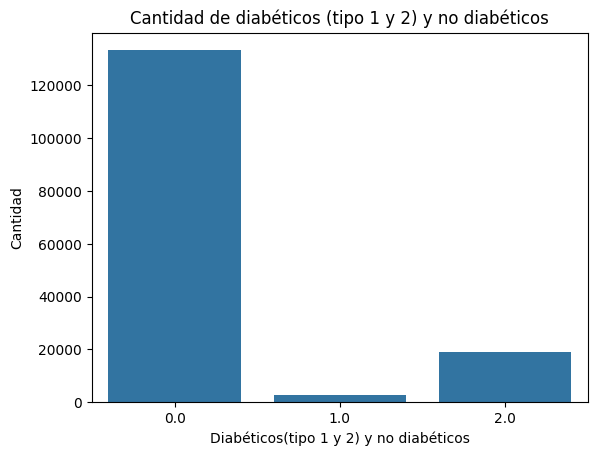

In [11]:
#Grafico la población de diabéticos

sns.countplot(data = dfdiabetes_sin_outliers, x = 'Diabetes')

#Agrego el título

plt.title('Cantidad de diabéticos (tipo 1 y 2) y no diabéticos')

#Coloco el nombre a los ejes

plt.xlabel('Diabéticos(tipo 1 y 2) y no diabéticos')
plt.ylabel('Cantidad')

#Muestro el gráfico, las referencias son: 1:  Fumador, 2: No fumador

plt.show()

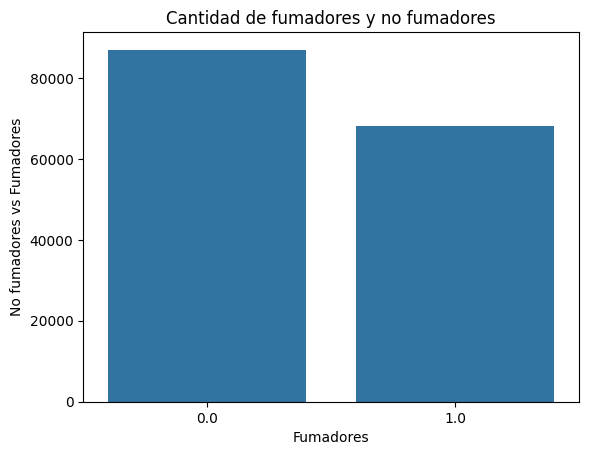

In [12]:
#Grafico la población de fumadores y no fumadores

sns.countplot(data = dfdiabetes_sin_outliers, x = 'Smoker')

#Agrego el título

plt.title('Cantidad de fumadores y no fumadores')

#Coloco el nombre a los ejes

plt.xlabel('Fumadores')
plt.ylabel('No fumadores vs Fumadores')

#Muestro el gráfico, las referencias son: 1:  Fumador, 2: No fumador

plt.show()

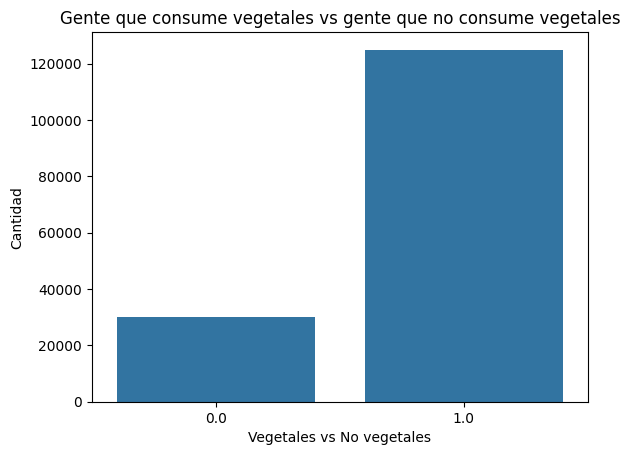

In [13]:
#Grafico la cantidad de gente que consume vegetales al menos una vez por día

sns.countplot(data = dfdiabetes_sin_outliers, x = 'Veggies')

#Agrego un título

plt.title('Gente que consume vegetales vs gente que no consume vegetales')

#Nombro los ejes

plt.xlabel('Vegetales vs No vegetales')
plt.ylabel('Cantidad')

#Muestro el gràfico, referencia: 0: No consume vegetales, 1: Consume vegetales

plt.show()

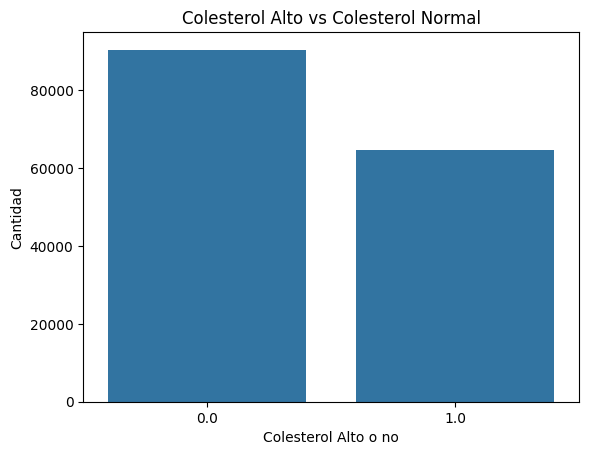

In [14]:
#Grafico la cantidad de gente con colesterol alto vs las que no.

sns.countplot(data = dfdiabetes_sin_outliers, x = 'HighChol')

#Agrego un título

plt.title('Colesterol Alto vs Colesterol Normal' )

#Nombro los ejes

plt.xlabel('Colesterol Alto o no')
plt.ylabel('Cantidad')

#Muestro el gráfico, referencia: 0: Colesterol Alto, 1: Colesterol Bajo

plt.show()

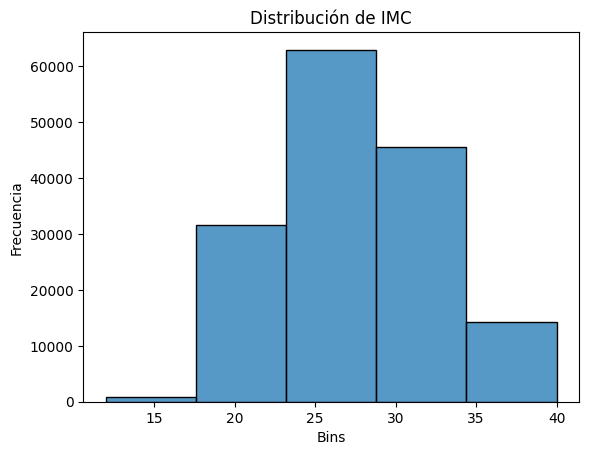

In [15]:
#Grafico un histograma para ver cómo están distribuidas las edades

sns.histplot(data =dfdiabetes_sin_outliers, x = 'BMI', bins = 5)

#Agrego un título

plt.title('Distribución de IMC')

#Agrego los ejes

plt.xlabel('Bins')
plt.ylabel('Frecuencia')

plt.show()

Análisis bivariado

La intención en esta sección es graficar dos variables, con el objetivo de observar si existe alguna correlación entre las mismas. Dichas variables deberían ser pertinentes de analizar, de manera de sacar conclusiones y poder seguir un curso de acción.

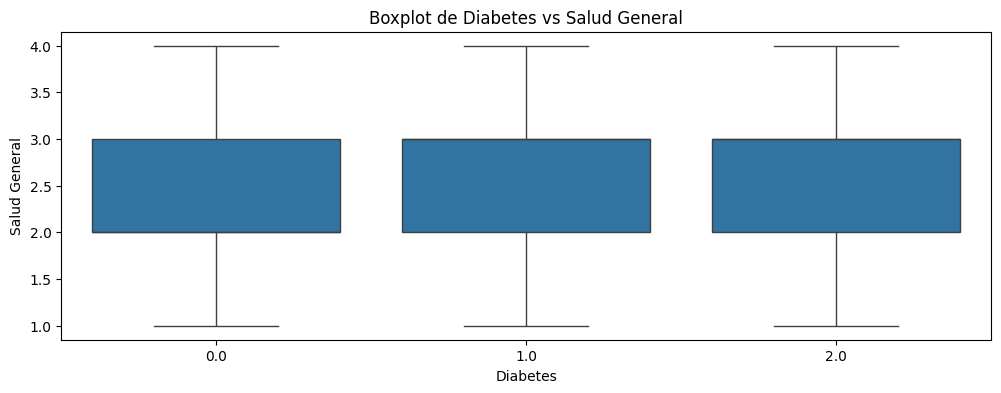

In [16]:
#¿Hay relación entre la diabetes y la salud general de la persona?

plt.figure(figsize = (12,4))
sns.boxplot(data = dfdiabetes_sin_outliers, x='Diabetes', y='GenHlth')

#Coloco título y nombro los ejes

plt.title('Boxplot de Diabetes vs Salud General')
plt.xlabel('Diabetes')
plt.ylabel('Salud General')

#Muestro el gráfico

plt.show()

Aquí podemos observar la incidencia de la salud general en la diabetes tipo 2. El resultado es previsible, dado que mientras peor sean sus hábitos alimenticios y físicos, es más probable que contraiga diabetes tipo 2. En diabetes tipo 1 se puede observar un espectro amplio de valores, pero esta es una diabetes autoinmune no causada por los hábitos de la persona.

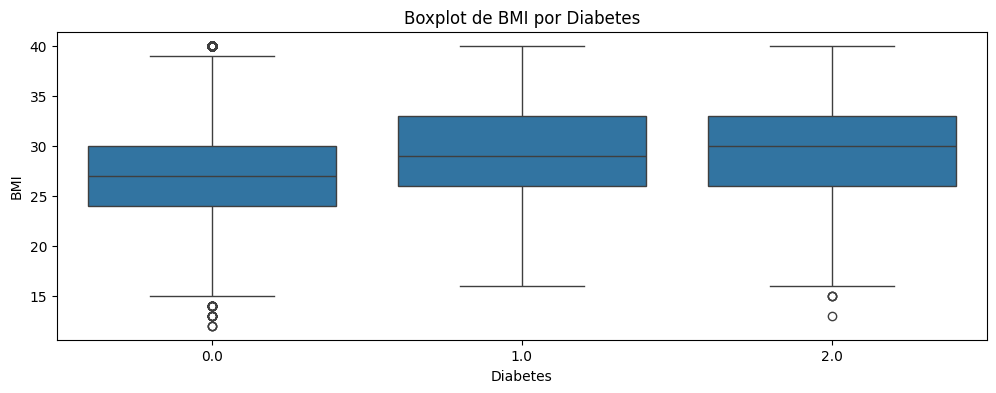

In [17]:
#¿Hay relación entre la diabetes y el Índice de Masa Corporal?

plt.figure(figsize = (12,4))
sns.boxplot(data=dfdiabetes_sin_outliers, x='Diabetes', y='BMI')

#Coloco título y nombro los ejes

plt.title('Boxplot de BMI por Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('BMI')

#Muestro el gráfico

plt.show()

En este caso, podemos ver una leve diferencia en el IMC de los no diabéticos, diabéticos tipo 1 y 2. Como es natural, la diabetes tipo 2 es la que alcanza los valores de IMC, muchos llegando a valores de sobrepeso y obesidad (descontamos los valores alejados, que son valores sin un sentido físico para este caso).

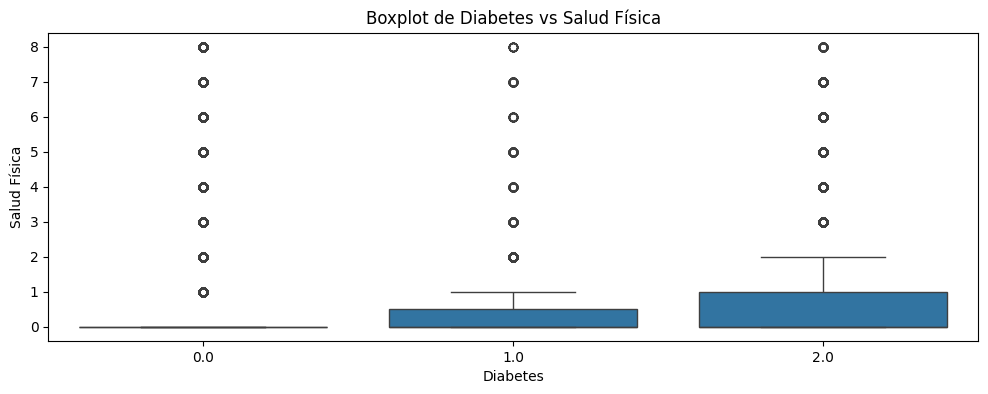

In [18]:
#¿Hay relación entre la diabetes y la salud física de la persona?

plt.figure(figsize = (12,4))
sns.boxplot(data = dfdiabetes_sin_outliers, x='Diabetes', y='PhysHlth')

#Coloco título y nombro los ejes

plt.title('Boxplot de Diabetes vs Salud Física')
plt.xlabel('Diabetes')
plt.ylabel('Salud Física')

#Muestro el gráfico

plt.show()

En este caso, observamos un rango de valores relativamente amplio para diabetes tipo 1 y 2, pero siendo diabetes 2 la que alcanza los valores más altos de peor salud física, lo cual es esperable.

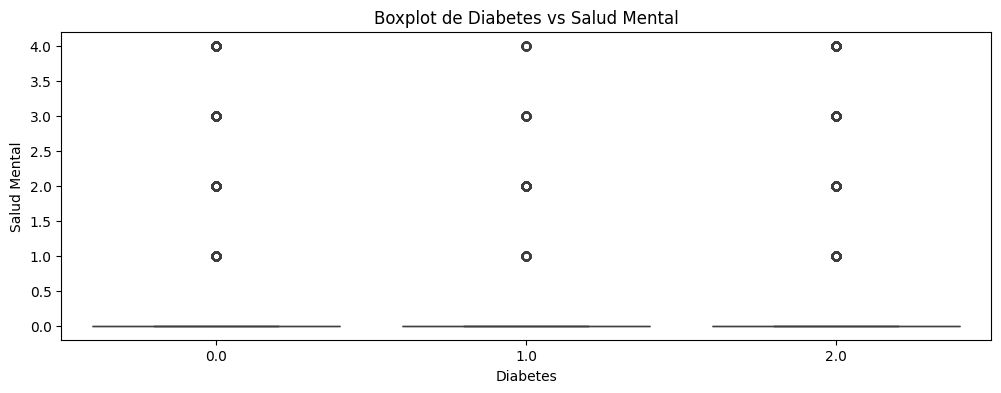

In [19]:
#¿Hay relación entre la diabetes y la salud mental de la persona?

plt.figure(figsize = (12,4))
sns.boxplot(data = dfdiabetes_sin_outliers, x='Diabetes', y='MentHlth')

#Coloco título y nombro los ejes

plt.title('Boxplot de Diabetes vs Salud Mental')
plt.xlabel('Diabetes')
plt.ylabel('Salud Mental')

#Muestro el gráfico

plt.show()

En este caso, no pueden verse diferencias muy significativas entre los tres grupos, tal vez el grupo de diabetes tipo 1 tiene valores de salud mental ligeramente más alto.

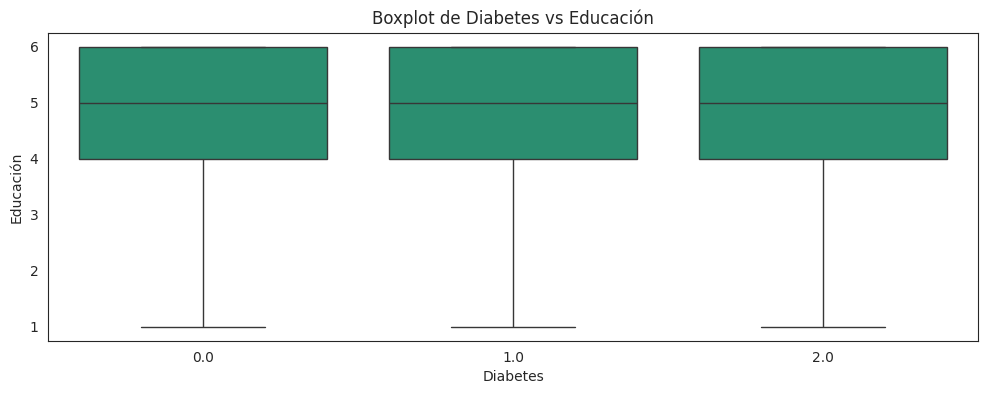

In [37]:
#¿Hay relación entre la diabetes y la educación de la persona?

plt.figure(figsize = (12,4))
sns.boxplot(data = dfdiabetes_sin_outliers, x='Diabetes', y='Education')
#sns.set_palette('Dark2', 7)

#Coloco título y nombro los ejes

plt.title('Boxplot de Diabetes vs Educación')
plt.xlabel('Diabetes')
plt.ylabel('Educación')

#Muestro el gráfico

plt.show()

En este caso, no puede verse diferencia entre los tres grupos, por lo que cabe pensar que no hay relación entre la diabetes y el nivel educativo de la persona en cuestión.

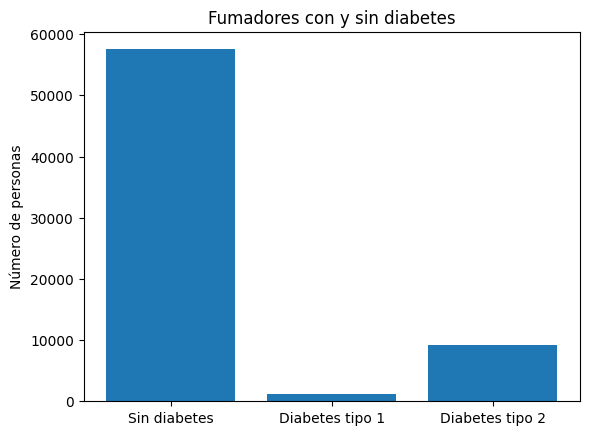

Diabetes
0.0    57526
2.0     9243
1.0     1257
Name: count, dtype: int64


In [21]:
#Si tomamos la población de fumadores, ¿se puede concluir que hay una gran proporción de diabéticos entre ellos?

Smokers = dfdiabetes_sin_outliers[dfdiabetes_sin_outliers['Smoker'] == 1]

conteo_diabetes = Smokers['Diabetes'].value_counts()

#Seteamos los ejes y graficamos

fig, ax = plt.subplots()
ax.bar(conteo_diabetes.index, conteo_diabetes.values)
ax.set_xticks(conteo_diabetes.index)
ax.set_xticklabels(['Sin diabetes', 'Diabetes tipo 2', 'Diabetes tipo 1'])
ax.set_ylabel('Número de personas')
ax.set_title('Fumadores con y sin diabetes')
plt.show()
print(conteo_diabetes)

Observamos que el grupo más grande de fumadores no tiene diabetes. Los diabéticos tipo 2 que son fumadores representan el segundo escalafón en lo referido a cantidad. Finalmente, la cantidad de diabéticos tipo 1 que fuman es muy pequeña.

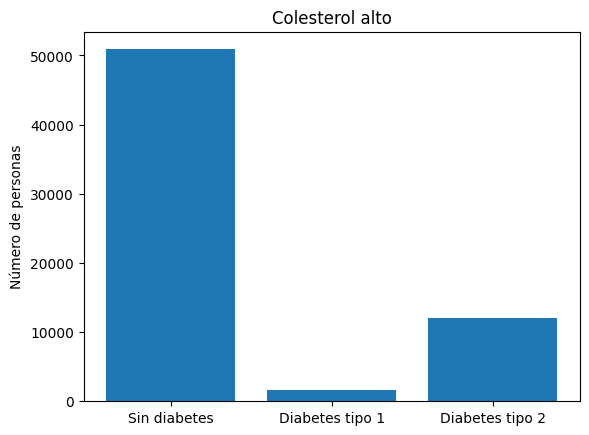

Diabetes
0.0    50895
2.0    12026
1.0     1646
Name: count, dtype: int64


In [22]:
#Si tomamos la población de gente con el colesterol alto, ¿se puede concluir que hay una gran proporción de diabéticos entre ellos?

#Contamos cuántas personas hay con colesterol alto y observamos cuántas hay con cada tipo de diabetes

H_chol = dfdiabetes_sin_outliers[dfdiabetes_sin_outliers['HighChol'] == 1]

conteo_diabetes_hc = H_chol['Diabetes'].value_counts()

#Seteamos ejes, título y graficamos

fig, ax = plt.subplots()
ax.bar(conteo_diabetes_hc.index, conteo_diabetes_hc.values)
ax.set_xticks(conteo_diabetes_hc.index)
ax.set_xticklabels(['Sin diabetes', 'Diabetes tipo 2', 'Diabetes tipo 1'])
ax.set_ylabel('Número de personas')
ax.set_title('Colesterol alto')
plt.show()
print(conteo_diabetes_hc)

Este caso se parece bastante al anterior, la gente con colesterol alto que no tiene diabetes representa la mayoría de la muestra (probablementente debido a la naturaleza del dataset) y la gente con diabetes tipo 2 en segundo lugar, lo cual tiene sentido, dado que sabemos cómo afecta el colesterol alto a provocar diabetes tipo 2.

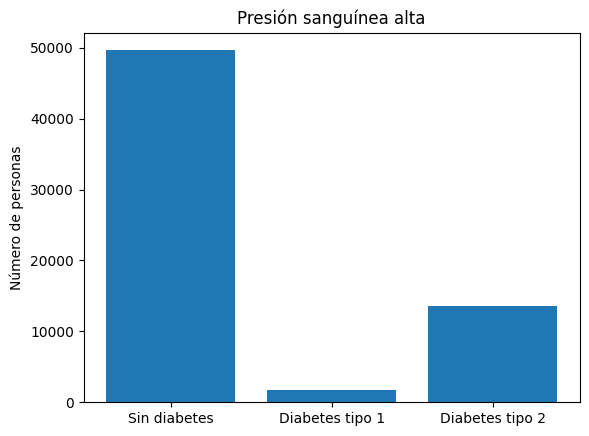

Diabetes
0.0    49655
2.0    13569
1.0     1667
Name: count, dtype: int64


In [23]:
#Si tomamos la población de gente con presión sanguínea alta, ¿se puede concluir que hay una gran proporción de diabéticos entre ellos?

#Contamos cuántas personas hay con presión sanguínea alta y observamos cuántas hay con cada tipo de diabetes

H_BloodPress = dfdiabetes_sin_outliers[dfdiabetes_sin_outliers['HighBP'] == 1]

conteo_diabetes_hbp = H_BloodPress['Diabetes'].value_counts()

#Graficamos utilizando otro gráfico de barras.

fig, ax = plt.subplots()
ax.bar(conteo_diabetes_hbp.index, conteo_diabetes_hbp.values)
ax.set_xticks(conteo_diabetes_hbp.index)
ax.set_xticklabels(['Sin diabetes', 'Diabetes tipo 2', 'Diabetes tipo 1'])
ax.set_ylabel('Número de personas')
ax.set_title('Presión sanguínea alta')
plt.show()
print(conteo_diabetes_hbp)

Otra vez se puede ver un gráfico muy parecido a los anteriores, podemos ver cierta relación entre presión sanguínea alta y diabetes tipo 2, lo cual no debe sorprendernos. Otra vez el grupo más grande es el que no tiene diabetes y el de diabetes tipo 1 es un grupo muy pequeño.

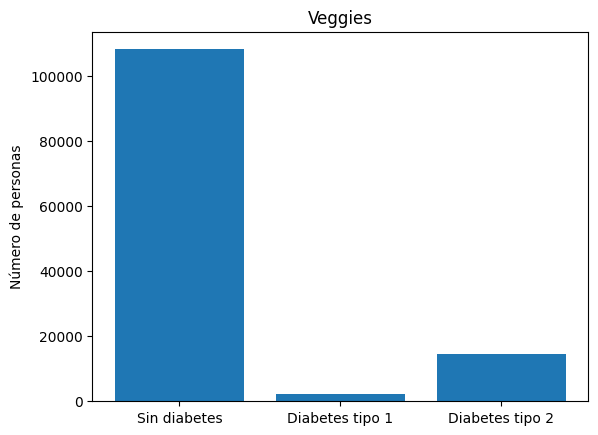

Diabetes
0.0    108127
2.0     14635
1.0      2202
Name: count, dtype: int64


In [24]:
#La gente que come verduras al menos una vez al día, ¿tiene una menor tendencia a tener diabetes?

#Contamos cuántas personas comen verduras y observamos cuántas hay con cada tipo de diabetes.

Veggie = dfdiabetes_sin_outliers[dfdiabetes_sin_outliers['Veggies'] == 1]

conteo_diabetes_veggies = Veggie['Diabetes'].value_counts()

#Graficamos utilizando otro gráfico de barras.

fig, ax = plt.subplots()
ax.bar(conteo_diabetes_veggies.index, conteo_diabetes_veggies.values)
ax.set_xticks(conteo_diabetes_veggies.index)
ax.set_xticklabels(['Sin diabetes', 'Diabetes tipo 2', 'Diabetes tipo 1'])
ax.set_ylabel('Número de personas')
ax.set_title('Veggies')
plt.show()
print(conteo_diabetes_veggies)

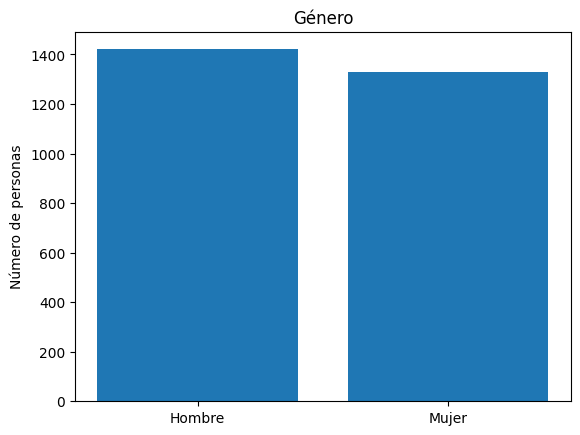

Sex
0.0    1421
1.0    1330
Name: count, dtype: int64


In [25]:
#¿Hay una mayor tendencia a tener diabetes según el sexo de la persona?


Diabetes_count = dfdiabetes_sin_outliers[dfdiabetes_sin_outliers['Diabetes'] == 1]

conteo_diabetes_genero = Diabetes_count['Sex'].value_counts()

#Graficamos utilizando otro gráfico de barras.

fig, ax = plt.subplots()
ax.bar(conteo_diabetes_genero.index, conteo_diabetes_genero.values)
ax.set_xticks(conteo_diabetes_genero.index)
ax.set_xticklabels(['Hombre', 'Mujer'])
ax.set_ylabel('Número de personas')
ax.set_title('Género')
plt.show()
print(conteo_diabetes_genero)

En este gráfico puede verse una mayor tendencia de los hombres a tener diabetes.

#9 - Feature Engineering

El propósito de esta sección es utilizar Polynomial Features y "Canaritos" para encontrar nuevas features que tengan importancia para el modelo, así como descartar aquellas que no son de peso.

In [ ]:
#Asignación de variables

X = dfdiabetes_sin_outliers.drop('Diabetes', axis = 1)

Y = dfdiabetes_sin_outliers['Diabetes']

#Multiplico las features hasta grado 2.

poly = PolynomialFeatures(degree = 2, include_bias = False)

#columnas_numericas = X.select_dtypes(include=['float64'])

#indices = list(columnas_numericas.columns)

X_poly = poly.fit_transform(X)

#Paso los datos a un dataframe nuevo

X = pd.DataFrame(X_poly, columns = poly.get_feature_names_out(input_features = X.columns))


# Genero 20 canaritos (variables con ruido)

np.random.seed(10000)
canaritos = pd.DataFrame(np.random.rand(X.shape[0], 20), columns=[f'canarito_{i}' for i in range(20)])

# Agregar los canaritos a X
X = pd.concat([X, canaritos], axis=1)

# Dividir en training y testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10000)

# Elijo Catboost para predecir, dado que es bueno para predecir categorías

catboost = CatBoostClassifier(iterations = 100, learning_rate = 0.1, depth = 10, verbose = False)

# Ajustar modelo
catboost.fit(X_train, y_train)

#Imprimo X con los polynomial features y canaritos

print(X)


        HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  \
0                        0.0     0.0       0.0        0.0  25.0     1.0   
1                        0.0     1.0       0.0        1.0  27.0     0.0   
2                        0.0     1.0       1.0        1.0  24.0     0.0   
3                        0.0     1.0       1.0        1.0  25.0     1.0   
4                        0.0     1.0       1.0        1.0  25.0     1.0   
...                      ...     ...       ...        ...   ...     ...   
155004                   0.0     0.0       0.0        1.0  27.0     0.0   
155005                   0.0     1.0       1.0        1.0  18.0     0.0   
155006                   0.0     0.0       0.0        1.0  28.0     0.0   
155007                   0.0     1.0       0.0        1.0  23.0     0.0   
155008                   1.0     1.0       1.0        1.0  25.0     0.0   

        Stroke  PhysActivity  Fruits  Veggies  ...  canarito_10  canarito_11  \
0          0.0     

In [ ]:
#Observo la importancia de las features

feature_importances = pd.DataFrame({'Feature': X.columns,
                                    'Importance': catboost.feature_importances_}).sort_values(by='Importance',
                                                                                          ascending=False)
feature_importances

,Feature,Importance
221,GenHlth Age,4.630168
96,CholCheck Age,2.759188
64,HighChol BMI,2.483085
108,BMI GenHlth,2.333096
45,HighBP BMI,2.310525
...,...,...
191,HvyAlcoholConsump PhysHlth,0.000000
70,HighChol HvyAlcoholConsump,0.000000
72,HighChol NoDocbcCost,0.000000
181,Veggies DiffWalk,0.000000


Hay muchos "canaritos" que están rankeados arriba, por lo que se podría crear un dataframe nuevo con las features importantes y descartar las demás.

In [ ]:
#Creo un vector con las features importantes, considero importantes las features que están por encima de la primera "capa geológica" de canaritos

important_features = ['GenHlth Age', 'CholCheck Age', 'HighChol BMI', 'BMI GenHlth', 'HighBP BMI', 'BMI Age', 'CholCheck BMI',
                      'CholCheck GenHlth', 'BMI AnyHealthcare', 'HighChol GenHlth', 'HighBP Age', 'Sex Age', 'HighBP GenHlth', 'Age']

#Creo un dataframe nuevo con las features importantes, según el análisis anterior.

df_important = X[important_features].copy()

print(df_important)

        GenHlth Age  CholCheck Age  HighChol BMI  BMI GenHlth  HighBP BMI  \
0              21.0            0.0           0.0         75.0         0.0   
1              22.0           11.0           0.0         54.0        27.0   
2              22.0           11.0          24.0         48.0        24.0   
3              20.0           10.0          25.0         50.0        25.0   
4              33.0           11.0          25.0         75.0        25.0   
...             ...            ...           ...          ...         ...   
155004          3.0            3.0           0.0         27.0         0.0   
155005         44.0           11.0          18.0         72.0        18.0   
155006          2.0            2.0           0.0         28.0         0.0   
155007         21.0            7.0           0.0         69.0        23.0   
155008         18.0            9.0          25.0         50.0        25.0   

        BMI Age  CholCheck BMI  CholCheck GenHlth  BMI AnyHealthcare  \
0  

#10 - Búsqueda de los mejores hiperparámetros posibles y predicción en modelos de clasifiación

###10-1-1 BayesSearch y Catboost

In [ ]:
X = df_important

# Divido en training y testing

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y, random_state = 10000)

scaler = StandardScaler()

X_train_escalado = scaler.fit_transform(X_train.select_dtypes(include=['int64', 'float64']))
X_test_escalado = scaler.transform(X_test.select_dtypes(include=['int64', 'float64']))

X_train_escalado = pd.DataFrame(X_train_escalado, columns=X_train.select_dtypes(include=['int64', 'float64']).columns, index=X_train.index)
X_test_escalado = pd.DataFrame(X_test_escalado, columns=X_test.select_dtypes(include=['int64', 'float64']).columns, index=X_test.index)

#Update de datos

X_train.update(X_train_escalado)
X_test.update(X_test_escalado)


In [ ]:
#Defino qué hiperparámetros usaré para Catboost

hiper_cboost = {
         'learning_rate': Real(0.01, 0.3, 'uniform'),
         'depth': Integer(3, 10),
         'iterations': Integer(10, 100),
}

# Instancio BayesSearchCV y defino como validación cruzada a Stratified K Fold

cv_cboost = StratifiedKFold(n_splits=5, shuffle=True, random_state=10000)

cboost = CatBoostClassifier (random_state = 10000)

bayes_search_cboost = BayesSearchCV(cboost, hiper_cboost, n_iter=5, scoring = 'accuracy', cv = cv_cboost, random_state=10000, n_jobs = -1, verbose = False)

# Ajustar BayesSearchCV

bayes_search_cboost.fit(X_train, Y_train)

# Imprimir mejores parametros

print(f'Best Parameters: {bayes_search_cboost.best_params_}')


0:	learn: 0.7777711	total: 47.3ms	remaining: 3.22s
1:	learn: 0.6316940	total: 93.3ms	remaining: 3.12s
2:	learn: 0.5481267	total: 135ms	remaining: 2.97s
3:	learn: 0.4956694	total: 180ms	remaining: 2.93s
4:	learn: 0.4614350	total: 221ms	remaining: 2.83s
5:	learn: 0.4388251	total: 268ms	remaining: 2.82s
6:	learn: 0.4227013	total: 312ms	remaining: 2.77s
7:	learn: 0.4115652	total: 356ms	remaining: 2.71s
8:	learn: 0.4040250	total: 401ms	remaining: 2.67s
9:	learn: 0.3992275	total: 448ms	remaining: 2.64s
10:	learn: 0.3960010	total: 495ms	remaining: 2.61s
11:	learn: 0.3937963	total: 539ms	remaining: 2.56s
12:	learn: 0.3918120	total: 584ms	remaining: 2.51s
13:	learn: 0.3907829	total: 627ms	remaining: 2.46s
14:	learn: 0.3900599	total: 666ms	remaining: 2.4s
15:	learn: 0.3893143	total: 711ms	remaining: 2.35s
16:	learn: 0.3886543	total: 753ms	remaining: 2.3s
17:	learn: 0.3881911	total: 809ms	remaining: 2.29s
18:	learn: 0.3878375	total: 852ms	remaining: 2.24s
19:	learn: 0.3875481	total: 901ms	remaini

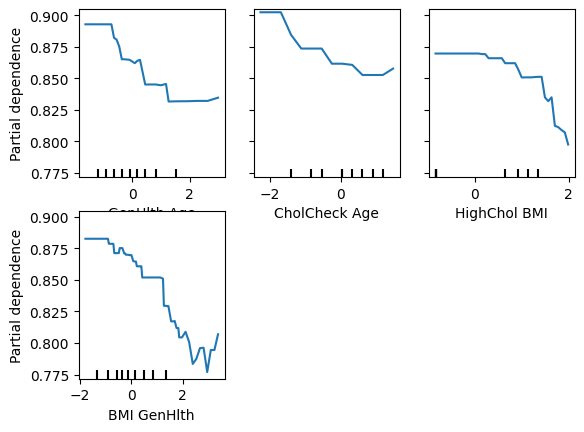

In [ ]:
#Observo la dependencia parcial de las cuatro primeras features

Features = [0, 1, 2, 3]

PartialDependenceDisplay.from_estimator(bayes_search_cboost.best_estimator_, X_train, Features, feature_names=X.columns, target = 0, grid_resolution = 100)

plt.show()

In [ ]:
#Utilizo los mejores parámetros encontrados por BayesSearchCV

Mejores_Parametros_Cboost = {
    'learning_rate': 0.28,
    'depth': 4,
    'iterations': 69
}

cbc = CatBoostClassifier(**Mejores_Parametros_Cboost)

cbc.fit(X_train, Y_train)

Y_pred = cbc.predict(X_test)


0:	learn: 0.7792530	total: 45.6ms	remaining: 3.1s
1:	learn: 0.6339230	total: 89.8ms	remaining: 3.01s
2:	learn: 0.5498012	total: 136ms	remaining: 2.98s
3:	learn: 0.4967772	total: 179ms	remaining: 2.9s
4:	learn: 0.4616594	total: 224ms	remaining: 2.86s
5:	learn: 0.4383462	total: 269ms	remaining: 2.83s
6:	learn: 0.4225259	total: 311ms	remaining: 2.75s
7:	learn: 0.4118236	total: 369ms	remaining: 2.81s
8:	learn: 0.4044551	total: 413ms	remaining: 2.75s
9:	learn: 0.3991040	total: 458ms	remaining: 2.7s
10:	learn: 0.3954752	total: 509ms	remaining: 2.69s
11:	learn: 0.3930694	total: 551ms	remaining: 2.62s
12:	learn: 0.3913324	total: 595ms	remaining: 2.56s
13:	learn: 0.3901175	total: 636ms	remaining: 2.5s
14:	learn: 0.3892536	total: 683ms	remaining: 2.46s
15:	learn: 0.3885466	total: 726ms	remaining: 2.4s
16:	learn: 0.3880353	total: 775ms	remaining: 2.37s
17:	learn: 0.3876594	total: 818ms	remaining: 2.32s
18:	learn: 0.3875264	total: 859ms	remaining: 2.26s
19:	learn: 0.3873900	total: 900ms	remaining:

In [ ]:
# Calculo métricas


accuracy_cboost = accuracy_score(Y_test, Y_pred)

cm_cboost = confusion_matrix(Y_test, Y_pred)

precision_cboost = precision_score(Y_test, Y_pred, average = 'weighted')

recall_cboost = recall_score(Y_test, Y_pred, average = 'weighted')

f1_cboost = f1_score(Y_test, Y_pred, average = 'weighted')

#Imprimo métricas

print('Accuracy: ', accuracy_cboost)

print(cm_cboost)

print('Precision: ', precision_cboost)

print('Recall: ', recall_cboost)

print('F1 - score: ', f1_cboost)

Accuracy:  0.8608261832569942
[[39689     0   306]
 [  796     0    29]
 [ 5341     0   342]]
Precision:  0.8066095863562643
Recall:  0.8608261832569942
F1 - score:  0.8086267839776643


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###10-1-2 XGBoost y BayesSearch

In [ ]:
#Ahora buscaremos los hiperparámetros "óptimos" para XGboost.

hiper_xgboost = {
         'learning_rate': Real(0.05, 0.1, 'uniform'),
         'n_estimators': Integer(100, 400),
         'max_depth': Integer(3, 7),
}

# Instancio BayesSearchCV

xgboost = XGBClassifier (n_stimators = 100, random_state = 10000)

cv_xgboost = StratifiedKFold(n_splits=5, shuffle=True, random_state=10000)

bayes_search_xgboost = BayesSearchCV(xgboost, hiper_xgboost, n_iter=5, scoring = 'accuracy', cv = cv_xgboost, random_state=10000, n_jobs = -1, verbose = False)

# Ajustar BayesSearchCV

bayes_search_xgboost.fit(X_train, Y_train)

# Imprimir mejores parametros

print(f'Best Parameters: {bayes_search_xgboost.best_params_}')


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [23:23:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_stimators" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: OrderedDict([('learning_rate', 0.06180492639967771), ('max_depth', 4), ('n_estimators', 153)])


In [ ]:
#Utilizo los mejores parámetros encontrados por BayesSearchCV

Mejores_Parametros_XGboost = {
    'learning_rate': 0.06,
    'max_depth': 4,
    'n_stimators': 153,
}

xgb = XGBClassifier(**Mejores_Parametros_XGboost)

xgb.fit(X_train, Y_train)

Y_pred = xgb.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [23:33:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_stimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Calculo métricas


accuracy_xgboost = accuracy_score(Y_test, Y_pred)

cm_xgboost = confusion_matrix(Y_test, Y_pred)

precision_xgboost = precision_score(Y_test, Y_pred, average = 'weighted')

recall_xgboost = recall_score(Y_test, Y_pred, average = 'weighted')

f1_xgboost = f1_score(Y_test, Y_pred, average = 'weighted')

#Imprimo métricas

print('Accuracy: ', accuracy_xgboost)

print(cm_xgboost)

print('Precision: ', precision_xgboost)

print('Recall: ', recall_xgboost)

print('F1 - score: ', f1_xgboost)

Accuracy:  0.8611057351138636
[[39748     0   247]
 [  801     0    24]
 [ 5387     0   296]]
Precision:  0.8079928976425951
Recall:  0.8611057351138636
F1 - score:  0.807221934609544


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###10-1-3 LightGBM y BayesSearch

In [ ]:
#Defino qué hiperparámetros usaré para LightGBM

hiper_lgbm = {
         'learning_rate': Real(0.01, 0.1, 'uniform'),
         'max_depth': Integer(3, 10),
         'num_leaves': Integer(20, 100),
}

# Instancio BayesSearchCV

lgbm = LGBMClassifier(random_state = 10000)

cv_lgbm = StratifiedKFold(n_splits=5, shuffle=True, random_state=10000)

bayes_search_lgbm = BayesSearchCV(lgbm, hiper_lgbm, n_iter=5, scoring = 'accuracy', cv = cv_lgbm, random_state=10000, n_jobs = -1, verbose = False)

# Ajustar BayesSearchCV

bayes_search_lgbm.fit(X_train, Y_train)

# Imprimir mejores parametros

print(f'Best Parameters: {bayes_search_lgbm.best_params_}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 506
[LightGBM] [Info] Number of data points in the train set: 108506, number of used features: 14
[LightGBM] [Info] Start training from score -0.150760
[LightGBM] [Info] Start training from score -4.031360
[LightGBM] [Info] Start training from score -2.102129
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

In [ ]:
#Utilizo los mejores parámetros encontrados por BayesSearchCV

Mejores_Parametros_Lgbm = {
    'learning_rate': 0.03,
    'max_depth': 4,
    'num_leaves': 34,
}

lgbm = LGBMClassifier(**Mejores_Parametros_Lgbm)

lgbm.fit(X_train, Y_train)

Y_pred = lgbm.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 506
[LightGBM] [Info] Number of data points in the train set: 108506, number of used features: 14
[LightGBM] [Info] Start training from score -0.150760
[LightGBM] [Info] Start training from score -4.031360
[LightGBM] [Info] Start training from score -2.102129
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

In [ ]:
# Calculo métricas


accuracy_lgbm = accuracy_score(Y_test, Y_pred)

cm_lgbm = confusion_matrix(Y_test, Y_pred)

precision_lgbm = precision_score(Y_test, Y_pred, average = 'weighted')

recall_lgbm = recall_score(Y_test, Y_pred, average = 'weighted')

f1_lgbm = f1_score(Y_test, Y_pred, average = 'weighted')

#Imprimo métricas

print('Accuracy: ', accuracy_lgbm)

print(cm_lgbm)

print('Precision: ', precision_lgbm)

print('Recall: ', recall_lgbm)

print('F1 - score: ', f1_lgbm)

Accuracy:  0.8610197191579038
[[39821     0   174]
 [  808     0    17]
 [ 5464     0   219]]
Precision:  0.8082989295439157
Recall:  0.8610197191579038
F1 - score:  0.8044389912747292


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###10-1-4 Random Forest y BayesSearch

In [ ]:
#Defino qué hiperparámetros usaré para RandomForest

hiper_rforest = {
         'n_estimators': Integer(50, 200),
         'max_depth': Integer(10, 70),
         'min_samples_split': Integer(2, 15),
}

# Instancio BayesSearchCV

rforest = RandomForestClassifier (random_state = 10000)

cv_rforest = StratifiedKFold(n_splits=5, shuffle=True, random_state=10000)

bayes_search_rforest = BayesSearchCV(rforest, hiper_rforest, n_iter=5, scoring = 'accuracy', cv = cv_rforest, random_state=10000, n_jobs = -1, verbose = False)

# Ajustar BayesSearchCV

bayes_search_rforest.fit(X_train, Y_train)

# Imprimir mejores parametros

print(f'Best Parameters: {bayes_search_rforest.best_params_}')

Best Parameters: OrderedDict([('max_depth', 16), ('min_samples_split', 11), ('n_estimators', 191)])


In [ ]:
#Utilizo los mejores parámetros encontrados por BayesSearchCV

Mejores_Parametros_Rforest = {
    'min_samples_split': 11,
    'max_depth': 16,
    'n_estimators': 191,
}

rfc = RandomForestClassifier(**Mejores_Parametros_Rforest)

rfc.fit(X_train, Y_train)

Y_pred = rfc.predict(X_test)

In [ ]:
# Calculo métricas


accuracy_rforest = accuracy_score(Y_test, Y_pred)

cm_rforest = confusion_matrix(Y_test, Y_pred)

precision_rforest = precision_score(Y_test, Y_pred, average = 'weighted')

recall_rforest = recall_score(Y_test, Y_pred, average = 'weighted')

f1_rforest = f1_score(Y_test, Y_pred, average = 'weighted')

#Imprimo métricas

print('Accuracy: ', accuracy_rforest)

print(cm_rforest)

print('Precision: ', precision_rforest)

print('Recall: ', recall_rforest)

print('F1 - score: ', f1_rforest)

Accuracy:  0.8586542803690085
[[39396     0   599]
 [  774     0    51]
 [ 5149     0   534]]
Precision:  0.8027639913282579
Recall:  0.8586542803690085
F1 - score:  0.8133100797801665


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Conclusiones: de los cuatro modelos implementados, el que mejor métricas arroja es Catboost, pero la diferencia se da en las milésimas de las métricas. Con respecto a normalizar los datos, Catboost y XGBoost arrojan los mismos resultados que cuando no se normalizan los datos, mientras que LightGBM y RandomForest dan métricas ligeramente mejor. En todos los casos, las métricas mejoran aproximadamente un 3% haciendo tratamiento de outliers. Se van a dejar en el enlace la notebook sin datos normalizados, además de un archivo Excel en el figurarán todas las métricas recogidas durante la prueba de los modelos.

#11 - PCA (Principal Components Analysis)

In [ ]:
#Asignación de variables

X = dfdiabetes_sin_outliers.drop('Diabetes', axis = 1)

Y = dfdiabetes_sin_outliers['Diabetes']

#Escalo las variables

scaler = StandardScaler()

X_escalado = scaler.fit_transform(X)

dfescalado = pd.DataFrame(X_escalado, columns = dfdiabetes.columns.difference(['Diabetes']))

dfescalado = pd.concat([dfescalado, Y], axis=1)

#Imprimo el dataframe escalado

print(dfescalado)

             Age  AnyHealthcare       BMI  CholCheck  DiffWalk  Education  \
0      -0.295572      -0.848568 -0.844929  -4.676837 -0.529568   1.130784   
1      -0.295572       1.178456 -0.844929   0.213820 -0.112798  -0.884342   
2      -0.295572       1.178456  1.183531   0.213820 -0.737953  -0.884342   
3      -0.295572       1.178456  1.183531   0.213820 -0.529568   1.130784   
4      -0.295572       1.178456  1.183531   0.213820 -0.529568   1.130784   
...          ...            ...       ...        ...       ...        ...   
155004 -0.295572      -0.848568 -0.844929   0.213820 -0.112798  -0.884342   
155005 -0.295572       1.178456  1.183531   0.213820 -1.988262  -0.884342   
155006 -0.295572      -0.848568 -0.844929   0.213820  0.095587  -0.884342   
155007 -0.295572       1.178456 -0.844929   0.213820 -0.946338  -0.884342   
155008  3.383271       1.178456  1.183531   0.213820 -0.529568  -0.884342   

         Fruits   GenHlth  HeartDiseaseorAttack    HighBP  ...    Income  \

In [ ]:
#Implemento PCA

pca = PCA()

X_pca = pca.fit_transform(X)

#Debo volcar los datos a un dataframe, dado que se devuelve como un objeto de Numpy

dfpca = pd.DataFrame(X_pca)

#Nombro las columnas

dfpca.columns = ['CP_'+str(i) for i in range(dfpca.shape[1])]

dfpca = pd.concat([dfpca, Y], axis = 1)

print(dfpca)


            CP_0      CP_1      CP_2      CP_3      CP_4      CP_5      CP_6  \
0       2.517518  0.488888  5.022962 -0.998843  0.807119 -1.404435 -1.394678   
1       0.565227 -2.898094  0.166605 -0.895404 -1.048462  0.893594  1.263506   
2       3.588726 -2.977865  1.633299 -0.667815  2.686894  0.958071  0.555609   
3       2.557483 -1.559226 -2.176622  1.364258 -0.134397 -0.505451 -0.264028   
4       2.510147 -3.247257  1.993936 -0.831021 -0.494437  0.583679 -0.350538   
...          ...       ...       ...       ...       ...       ...       ...   
155004  0.549739  5.058945  1.547089 -0.953963  0.360293 -1.625851  0.235819   
155005  9.421860 -3.321290  2.706221 -0.738263 -1.848059  2.530814 -0.372190   
155006 -0.472078  5.568291  4.755904 -1.209478  0.329022 -1.743864  0.662749   
155007  4.469423  0.390059  5.197411 -1.008666  0.231085 -0.765828 -1.103671   
155008  2.554747 -1.419330  3.593645 -0.990817  0.957859 -1.684843 -0.685608   

            CP_7      CP_8      CP_9  .

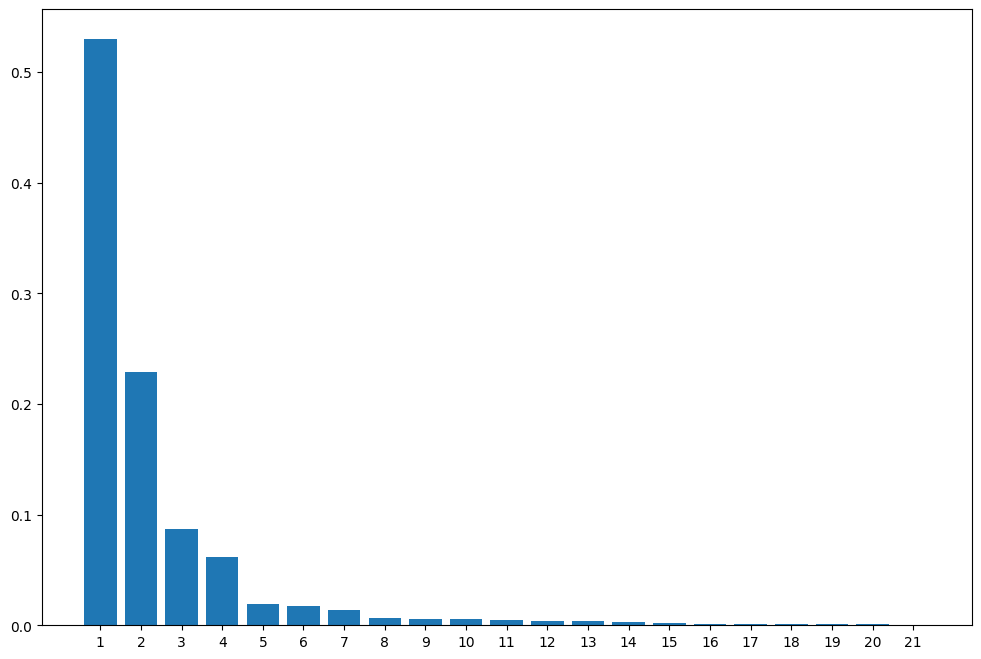

[0.53014966 0.22915983 0.08743184 0.06131256 0.0188871  0.01771417
 0.01408906 0.00657291 0.00551728 0.00538094 0.00484695 0.0039544
 0.00360406 0.00302249 0.00170563 0.00148853 0.00136838 0.00129687
 0.0009725  0.00086317 0.00066166]


In [ ]:
# Observo la varianza de cada componente principal

varianza_explicada = pca.explained_variance_ratio_

# Grafico

plt.figure(figsize=(12,8))
plt.bar(range(1, len(varianza_explicada) + 1), varianza_explicada)
plt.xticks(range(1, len(varianza_explicada) + 1))
plt.show()

print(varianza_explicada)

In [ ]:
#Creo un dataframe con los cuatro componentes principales de mayor varianza

vector_pc = ['CP_1', 'CP_2', 'CP_3', 'CP_4']

dfpca_componentes = dfpca[vector_pc].copy()

#Concateno con mi variable a predecir

dfpca_componentes = pd.concat([dfpca_componentes, Y], axis = 1)

print(dfpca_componentes)

            CP_1      CP_2      CP_3      CP_4 Diabetes
0       0.488888  5.022962 -0.998843  0.807119      0.0
1      -2.898094  0.166605 -0.895404 -1.048462      0.0
2      -2.977865  1.633299 -0.667815  2.686894      0.0
3      -1.559226 -2.176622  1.364258 -0.134397      0.0
4      -3.247257  1.993936 -0.831021 -0.494437      0.0
...          ...       ...       ...       ...      ...
155004  5.058945  1.547089 -0.953963  0.360293      0.0
155005 -3.321290  2.706221 -0.738263 -1.848059      2.0
155006  5.568291  4.755904 -1.209478  0.329022      0.0
155007  0.390059  5.197411 -1.008666  0.231085      0.0
155008 -1.419330  3.593645 -0.990817  0.957859      2.0

[155009 rows x 5 columns]


In [ ]:
#Defino X e Y y divido en training y testing

X = dfpca_componentes.drop('Diabetes', axis=1)
Y = dfpca_componentes['Diabetes']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y, random_state = 10000)

## A continuación se aplicarán los mismos modelos que se usaron para Polynomial Features más canaritos, incluida la búsqueda de los mejores hiperparámetros con Bayes Search.

In [ ]:
#Defino qué hiperparámetros usaré para Catboost

hiper_cboost_pca = {
         'learning_rate': Real(0.01, 0.3, 'uniform'),
         'depth': Integer(3, 10),
         'iterations': Integer(10, 100),
}

# Instancio BayesSearchCV

cboost_pca = CatBoostClassifier (random_state = 10000)

cv_cboost_pca = StratifiedKFold(n_splits=5, shuffle=True, random_state=10000)

bayes_search_cboost_pca = BayesSearchCV(cboost_pca, hiper_cboost_pca, n_iter=5, scoring = 'accuracy', cv = cv_cboost_pca, random_state=10000, n_jobs = -1, verbose = False)

# Ajustar BayesSearchCV

bayes_search_cboost_pca.fit(X_train, Y_train)

# Imprimir mejores parametros

print(f'Best Parameters: {bayes_search_cboost_pca.best_params_}')

0:	learn: 1.0219523	total: 45.3ms	remaining: 997ms
1:	learn: 0.9571227	total: 82.4ms	remaining: 865ms
2:	learn: 0.9018901	total: 123ms	remaining: 818ms
3:	learn: 0.8539560	total: 160ms	remaining: 760ms
4:	learn: 0.8119902	total: 196ms	remaining: 704ms
5:	learn: 0.7750417	total: 231ms	remaining: 654ms
6:	learn: 0.7424732	total: 284ms	remaining: 649ms
7:	learn: 0.7134997	total: 325ms	remaining: 610ms
8:	learn: 0.6875392	total: 364ms	remaining: 566ms
9:	learn: 0.6641700	total: 403ms	remaining: 524ms
10:	learn: 0.6432370	total: 440ms	remaining: 480ms
11:	learn: 0.6243612	total: 475ms	remaining: 435ms
12:	learn: 0.6073703	total: 539ms	remaining: 415ms
13:	learn: 0.5918939	total: 607ms	remaining: 390ms
14:	learn: 0.5778246	total: 665ms	remaining: 354ms
15:	learn: 0.5650263	total: 750ms	remaining: 328ms
16:	learn: 0.5533473	total: 828ms	remaining: 292ms
17:	learn: 0.5427152	total: 907ms	remaining: 252ms
18:	learn: 0.5329740	total: 972ms	remaining: 205ms
19:	learn: 0.5240938	total: 1.05s	remai

In [ ]:
#Utilizo los mejores parámetros encontrados por BayesSearchCV

Mejores_Parametros_Cboost_Pca = {
    'learning_rate': 0.18,
    'depth': 8,
    'iterations': 83
}

cbc = CatBoostClassifier(**Mejores_Parametros_Cboost_Pca)

cbc.fit(X_train, Y_train)

Y_pred = cbc.predict(X_test)

0:	learn: 0.8885064	total: 73.1ms	remaining: 5.99s
1:	learn: 0.7612401	total: 135ms	remaining: 5.45s
2:	learn: 0.6756819	total: 197ms	remaining: 5.26s
3:	learn: 0.6149818	total: 261ms	remaining: 5.16s
4:	learn: 0.5705638	total: 332ms	remaining: 5.18s
5:	learn: 0.5370059	total: 396ms	remaining: 5.08s
6:	learn: 0.5114974	total: 456ms	remaining: 4.95s
7:	learn: 0.4918265	total: 535ms	remaining: 5.01s
8:	learn: 0.4767869	total: 600ms	remaining: 4.93s
9:	learn: 0.4655098	total: 660ms	remaining: 4.82s
10:	learn: 0.4563313	total: 728ms	remaining: 4.76s
11:	learn: 0.4494089	total: 798ms	remaining: 4.72s
12:	learn: 0.4439226	total: 861ms	remaining: 4.63s
13:	learn: 0.4396392	total: 921ms	remaining: 4.54s
14:	learn: 0.4361985	total: 982ms	remaining: 4.45s
15:	learn: 0.4336722	total: 1.05s	remaining: 4.4s
16:	learn: 0.4312932	total: 1.11s	remaining: 4.31s
17:	learn: 0.4294477	total: 1.17s	remaining: 4.23s
18:	learn: 0.4281944	total: 1.23s	remaining: 4.15s
19:	learn: 0.4271344	total: 1.3s	remainin

In [ ]:
# Calculo métricas


accuracy_cboost_pca = accuracy_score(Y_test, Y_pred)

cm_cboost_pca = confusion_matrix(Y_test, Y_pred)

precision_cboost_pca = precision_score(Y_test, Y_pred, average = 'weighted')

recall_cboost_pca = recall_score(Y_test, Y_pred, average = 'weighted')

f1_cboost_pca = f1_score(Y_test, Y_pred, average = 'weighted')

#Imprimo métricas

print('Accuracy: ', accuracy_cboost_pca)

print(cm_cboost_pca)

print('Precision: ', precision_cboost_pca)

print('Recall: ', recall_cboost_pca)

print('F1 - score: ', f1_cboost_pca)

Accuracy:  0.8599875276863859
[[39986     0     9]
 [  824     0     1]
 [ 5677     0     6]]
Precision:  0.7856052792084347
Recall:  0.8599875276863859
F1 - score:  0.7955682749830165


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Ahora buscaremos los hiperparámetros "óptimos" para XGboost.

hiper_xgboost_pca = {
         'learning_rate': Real(0.05, 0.1, 'uniform'),
         'n_estimators': Integer(100, 400),
         'max_depth': Integer(3, 7),
}

# Instancio BayesSearchCV

xgboost_pca = XGBClassifier (n_stimators = 100, random_state = 10000)

cv_xgboost_pca = StratifiedKFold(n_splits=5, shuffle=True, random_state=10000)

bayes_search_xgboost_pca = BayesSearchCV(xgboost_pca, hiper_xgboost_pca, n_iter=5, scoring = 'accuracy', cv = cv_xgboost_pca, random_state=10000, n_jobs = -1, verbose = False)

# Ajustar BayesSearchCV

bayes_search_xgboost_pca.fit(X_train, Y_train)

# Imprimir mejores parametros

print(f'Best Parameters: {bayes_search_xgboost_pca.best_params_}')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [23:50:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_stimators" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: OrderedDict([('learning_rate', 0.06180492639967771), ('max_depth', 4), ('n_estimators', 153)])


In [ ]:
#Utilizo los mejores parámetros encontrados por BayesSearchCV

Mejores_Parametros_XGboost_Pca = {
    'learning_rate': 0.06,
    'max_depth': 4,
    'n_stimators': 153,
}

xgb = XGBClassifier(**Mejores_Parametros_XGboost_Pca)

xgb.fit(X_train, Y_train)

Y_pred = xgb.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [23:53:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_stimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Calculo métricas


accuracy_xgboost_pca = accuracy_score(Y_test, Y_pred)

cm_xgboost_pca = confusion_matrix(Y_test, Y_pred)

precision_xgboost_pca = precision_score(Y_test, Y_pred, average = 'weighted')

recall_xgboost_pca = recall_score(Y_test, Y_pred, average = 'weighted')

f1_xgboost_pca = f1_score(Y_test, Y_pred, average = 'weighted')

#Imprimo métricas

print('Accuracy: ', accuracy_xgboost_pca)

print(cm_xgboost_pca)

print('Precision: ', precision_xgboost_pca)

print('Recall: ', recall_xgboost_pca)

print('F1 - score: ', f1_xgboost_pca)

Accuracy:  0.8600520396533557
[[39995     0     0]
 [  825     0     0]
 [ 5683     0     0]]
Precision:  0.7396895109118973
Recall:  0.8600520396533557
F1 - score:  0.7953428131502686


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Defino qué hiperparámetros usaré para LightGBM

hiper_lgbm_pca = {
         'learning_rate': Real(0.01, 0.1, 'uniform'),
         'max_depth': Integer(3, 10),
         'num_leaves': Integer(20, 100),
}

# Instancio BayesSearchCV

lgbm_pca = LGBMClassifier(random_state = 10000)

cv_lgbmboost_pca = StratifiedKFold(n_splits=5, shuffle=True, random_state=10000)

bayes_search_lgbm_pca = BayesSearchCV(lgbm_pca, hiper_lgbm_pca, n_iter=5, scoring = 'accuracy', cv = cv_lgbmboost_pca, random_state=10000, n_jobs = -1, verbose = False)

# Ajustar BayesSearchCV

bayes_search_lgbm_pca.fit(X_train, Y_train)

# Imprimir mejores parametros

print(f'Best Parameters: {bayes_search_lgbm_pca.best_params_}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007268 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 108506, number of used features: 4
[LightGBM] [Info] Start training from score -0.150760
[LightGBM] [Info] Start training from score -4.031360
[LightGBM] [Info] Start training from score -2.102129
Best Parameters: OrderedDict([('learning_rate', 0.018680577297831014), ('max_depth', 8), ('num_leaves', 95)])


In [ ]:
#Utilizo los mejores parámetros encontrados por BayesSearchCV

Mejores_Parametros_Lgbm_Pca = {
    'learning_rate': 0.01,
    'max_depth': 8,
    'num_leaves': 95,
}

lgbm_pca = LGBMClassifier(**Mejores_Parametros_Lgbm_Pca)

lgbm_pca.fit(X_train, Y_train)

Y_pred = lgbm_pca.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007944 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 108506, number of used features: 4
[LightGBM] [Info] Start training from score -0.150760
[LightGBM] [Info] Start training from score -4.031360
[LightGBM] [Info] Start training from score -2.102129


In [ ]:
# Calculo métricas


accuracy_lgbm_pca = accuracy_score(Y_test, Y_pred)

cm_lgbm_pca = confusion_matrix(Y_test, Y_pred)

precision_lgbm_pca = precision_score(Y_test, Y_pred, average = 'weighted')

recall_lgbm_pca = recall_score(Y_test, Y_pred, average = 'weighted')

f1_lgbm_pca = f1_score(Y_test, Y_pred, average = 'weighted')

#Imprimo métricas

print('Accuracy: ', accuracy_lgbm_pca)

print(cm_lgbm_pca)

print('Precision: ', precision_lgbm_pca)

print('Recall: ', recall_lgbm_pca)

print('F1 - score: ', f1_lgbm_pca)

Accuracy:  0.8600520396533557
[[39995     0     0]
 [  825     0     0]
 [ 5683     0     0]]
Precision:  0.7396895109118973
Recall:  0.8600520396533557
F1 - score:  0.7953428131502686


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Defino qué hiperparámetros usaré para RandomForest

hiper_rforest_pca = {
         'n_estimators': Integer(50, 200),
         'max_depth': Integer(10, 70),
         'min_samples_split': Integer(2, 15),
}

# Instancio BayesSearchCV

rforest_pca = RandomForestClassifier (random_state = 10000)

cv_rforest_pca = StratifiedKFold(n_splits=5, shuffle=True, random_state=10000)

bayes_search_rforest_pca = BayesSearchCV(rforest_pca, hiper_rforest_pca, n_iter=5, scoring = 'accuracy', cv = cv_rforest_pca, random_state=10000, n_jobs = -1, verbose = False)

# Ajustar BayesSearchCV

bayes_search_rforest_pca.fit(X_train, Y_train)

# Imprimir mejores parametros

print(f'Best Parameters: {bayes_search_rforest_pca.best_params_}')

Best Parameters: OrderedDict([('max_depth', 16), ('min_samples_split', 11), ('n_estimators', 191)])


In [ ]:
#Utilizo los mejores parámetros encontrados por BayesSearchCV

Mejores_Parametros_Rforest_Pca = {
    'min_samples_split': 11,
    'max_depth': 16,
    'n_estimators': 191,
}

rfc_pca = RandomForestClassifier(**Mejores_Parametros_Rforest_Pca)

rfc_pca.fit(X_train, Y_train)

Y_pred = rfc_pca.predict(X_test)

In [ ]:
# Calculo métricas


accuracy_rforest_pca = accuracy_score(Y_test, Y_pred)

cm_rforest_pca = confusion_matrix(Y_test, Y_pred)

precision_rforest_pca = precision_score(Y_test, Y_pred, average = 'weighted')

recall_rforest_pca = recall_score(Y_test, Y_pred, average = 'weighted')

f1_rforest_pca = f1_score(Y_test, Y_pred, average = 'weighted')

#Imprimo métricas

print('Accuracy: ', accuracy_rforest_pca)

print(cm_rforest_pca)

print('Precision: ', precision_rforest_pca)

print('Recall: ', recall_rforest_pca)

print('F1 - score: ', f1_rforest_pca)

Accuracy:  0.8596864718405264
[[39946     0    49]
 [  821     0     4]
 [ 5651     0    32]]
Precision:  0.7861435326707821
Recall:  0.8596864718405264
F1 - score:  0.7965057496604165


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Conclusión: aplicar Polynomial Features con los datos normalizados y haciendo tratamiento de outliers da un resultado ligeramente mejor que aplicando PCA. En este caso, el modelo que arroja las mejores métricas es Catboost con Polynomial Features, datos normalizados y tratamiento de outliers. En la próxima entrega se va a implementar SMOTE y Binning/Bucketing para determinar si mejoran las métricas.